In [2]:
import pandas as pd

In [251]:
df=pd.read_csv("alzheimers_disease_data.csv")

In [4]:
df.shape

(2149, 35)

In [5]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df=df.drop(['PatientID','DoctorInCharge'], axis=1)
X=df.drop('Diagnosis',axis=1)
y=df.loc[:,'Diagnosis']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
categorical=X_train.loc[:,df.nunique()<5]
numerical=X_train.loc[:,df.nunique()>=5]

In [11]:
categorical.head()

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
630,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1
78,1,3,2,0,0,1,1,0,0,0,0,0,0,0,1,1,0
366,1,0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1996,0,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [12]:
numerical.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
1433,87,27.764232,16.543170,0.281379,5.923418,7.836104,165,104,152.867282,81.773928,36.315501,156.315737,25.399206,3.085543,6.643693
630,70,37.098744,1.360202,9.242990,1.819284,5.218052,144,93,172.951803,181.531732,59.846219,284.212782,8.292136,5.616830,3.884562
78,82,15.908275,16.329031,1.915913,6.607292,6.146166,90,112,234.274917,76.270979,96.793492,174.718861,21.042238,3.662461,4.013722
366,76,30.302432,11.814030,6.281170,6.204349,6.825155,95,119,233.623114,101.048013,23.251477,230.796600,28.609438,4.648135,9.355700
1996,61,24.565357,2.273373,9.976581,2.057188,4.715534,169,69,286.509759,58.658641,78.508468,225.360895,2.629135,9.601238,8.818932


In [13]:
c_names=categorical.columns.values
n_names=numerical.columns.values

In [ ]:
# scale the numerical col
from sklearn.preprocessing import StandardScaler

# scaling
# X_train, n_names, c_names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[n_names])
X_test_scaled = scaler.transform(X_test[n_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=n_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=n_names, index=X_test.index)

X_train_scaled = pd.concat([X_train_scaled, X_train[c_names]], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[c_names]], axis=1)

In [18]:
X_train_scaled.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,1.328523,0.010659,1.136669,-1.648973,0.327959,0.454049,1.187388,0.820033,-1.691239,-0.985130,...,0,0,0,0,0,0,0,0,0,0
630,-0.547367,1.305827,-1.492106,1.521599,-1.087222,-1.035466,0.375886,0.200660,-1.219698,1.317102,...,0,0,0,0,1,0,0,0,0,1
78,0.776791,-1.634359,1.099593,-1.070683,0.563772,-0.507425,-1.710833,1.270486,0.220038,-1.112128,...,0,0,0,0,0,0,0,1,1,0
366,0.114712,0.362836,0.317867,0.473723,0.424829,-0.121121,-1.517618,1.664632,0.204735,-0.540319,...,0,0,0,0,0,1,0,1,0,1
1996,-1.540486,-0.433186,-1.334000,1.781140,-1.005189,-1.321369,1.341960,-1.150699,1.446401,-1.518590,...,0,0,0,1,0,0,1,0,0,0


In [20]:
X_train_scaled.loc[:, c_names].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1433 to 860
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     1719 non-null   int64
 1   Ethnicity                  1719 non-null   int64
 2   EducationLevel             1719 non-null   int64
 3   Smoking                    1719 non-null   int64
 4   FamilyHistoryAlzheimers    1719 non-null   int64
 5   CardiovascularDisease      1719 non-null   int64
 6   Diabetes                   1719 non-null   int64
 7   Depression                 1719 non-null   int64
 8   HeadInjury                 1719 non-null   int64
 9   Hypertension               1719 non-null   int64
 10  MemoryComplaints           1719 non-null   int64
 11  BehavioralProblems         1719 non-null   int64
 12  Confusion                  1719 non-null   int64
 13  Disorientation             1719 non-null   int64
 14  PersonalityChanges         

In [21]:
X_train_scaled.loc[:, n_names].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1433 to 860
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1719 non-null   float64
 1   BMI                       1719 non-null   float64
 2   AlcoholConsumption        1719 non-null   float64
 3   PhysicalActivity          1719 non-null   float64
 4   DietQuality               1719 non-null   float64
 5   SleepQuality              1719 non-null   float64
 6   SystolicBP                1719 non-null   float64
 7   DiastolicBP               1719 non-null   float64
 8   CholesterolTotal          1719 non-null   float64
 9   CholesterolLDL            1719 non-null   float64
 10  CholesterolHDL            1719 non-null   float64
 11  CholesterolTriglycerides  1719 non-null   float64
 12  MMSE                      1719 non-null   float64
 13  FunctionalAssessment      1719 non-null   float64
 14  ADL        

In [41]:
# FAMD for X_train_scaled
X_train_famd=X_train_scaled
X_train_famd[c_names] = X_train_famd[c_names].astype('category')

In [42]:
X_train_famd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1433 to 860
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   float64 
 1   BMI                        1719 non-null   float64 
 2   AlcoholConsumption         1719 non-null   float64 
 3   PhysicalActivity           1719 non-null   float64 
 4   DietQuality                1719 non-null   float64 
 5   SleepQuality               1719 non-null   float64 
 6   SystolicBP                 1719 non-null   float64 
 7   DiastolicBP                1719 non-null   float64 
 8   CholesterolTotal           1719 non-null   float64 
 9   CholesterolLDL             1719 non-null   float64 
 10  CholesterolHDL             1719 non-null   float64 
 11  CholesterolTriglycerides   1719 non-null   float64 
 12  MMSE                       1719 non-null   float64 
 13  FunctionalAssessment       1719 non-

In [43]:
import prince

In [44]:
famd=prince.FAMD(n_components=20)
famd_comp=famd.fit_transform(X_train_famd)

In [45]:
famd_comp.head()

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1433,-1.968976,-0.030451,1.581688,3.828725,0.505706,-3.084889,0.172011,-0.154799,-3.331808,1.518776,2.023543,2.577575,1.729670,1.658848,-3.969834,1.462155,5.787942,-0.840504,-0.581474,-1.384937
630,3.579133,-2.080493,-5.686357,-1.957052,3.314321,2.019352,0.210486,1.735832,-0.135127,-4.815481,-1.696319,0.997638,-3.157192,-6.074064,-3.281678,4.226584,-3.422175,-2.225366,-1.811440,-3.079513
78,-5.079693,3.935754,0.524223,3.673145,-2.149914,-0.532896,-5.127360,-0.752731,1.040759,4.855523,-5.517034,5.868162,4.873746,1.264682,1.657279,-2.333995,-3.042520,-0.451698,0.049207,-4.344766
366,-4.669159,-1.434793,-4.491480,3.087748,0.897132,-3.658850,2.229387,2.279487,3.608362,-2.430312,0.305092,0.336521,2.964378,3.870004,5.009656,4.458517,0.155551,1.505069,2.776835,-0.746662
1996,-3.598851,-0.898696,6.238509,-1.364260,1.294580,0.242645,-1.698992,-0.963047,-1.298370,0.001035,-1.874140,-5.156689,-0.984505,1.537463,3.119431,5.061488,-2.655233,1.518040,-1.169494,1.118391


In [46]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,10.068,5.20%,5.20%
1,9.722,5.02%,10.23%
2,9.685,5.01%,15.23%
3,9.558,4.94%,20.17%
4,9.291,4.80%,24.97%
5,9.122,4.71%,29.69%
6,9.027,4.66%,34.35%
7,8.949,4.63%,38.98%
8,8.732,4.51%,43.49%


In [70]:
famd.plot(
    X_train_famd,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [ ]:
# k-means using 15 components

k=2, Silhouette Score=0.0790
k=3, Silhouette Score=0.0826
k=4, Silhouette Score=0.0748
k=5, Silhouette Score=0.0524
k=6, Silhouette Score=0.0701
k=7, Silhouette Score=0.0717
k=8, Silhouette Score=0.0702
k=9, Silhouette Score=0.0688
k=10, Silhouette Score=0.0654


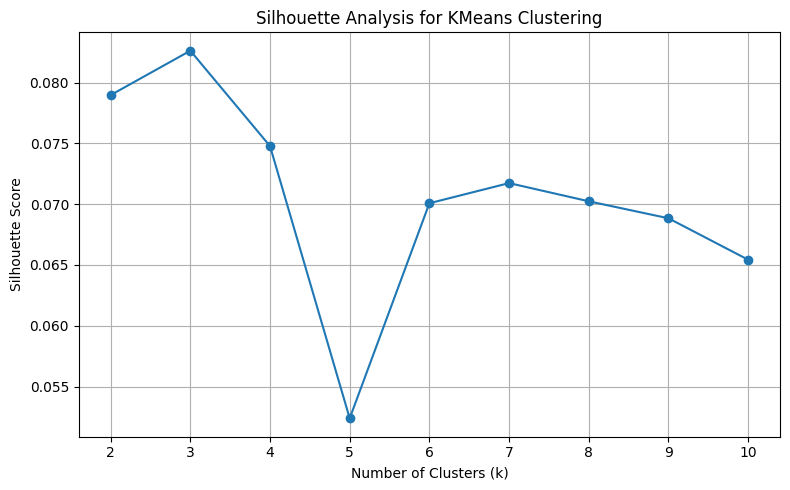

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

comp=famd_comp
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(comp)
    score = silhouette_score(comp, labels)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.4f}')

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.grid(True)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


In [ ]:
# no clusters

In [ ]:
# Model fitting

In [76]:
y_train.value_counts()

Diagnosis
0    1112
1     607
Name: count, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTENC

c_indices = [X_train_scaled.columns.get_loc(col) for col in c_names]

smote_nc = SMOTENC(categorical_features=c_indices, random_state=0)
X_train_scaled_res, y_train_res=smote_nc.fit_resample(X_train_scaled, y_train)

In [84]:
X_train_scaled_res.shape

(2224, 32)

In [87]:
y_train_res.value_counts()

Diagnosis
0    1112
1    1112
Name: count, dtype: int64

In [92]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

# X_train_scaled, c_names, n_names

ohe=OneHotEncoder(drop='first', sparse_output=False)
X_train_scaled_res_ohe=ohe.fit_transform(X_train_scaled_res.loc[:,c_names])

column_names=ohe.get_feature_names_out(c_names)
X_train_scaled_res_ohe=pd.DataFrame(X_train_scaled_res_ohe, columns=column_names, index=X_train_scaled_res.index)

# X_test
X_test_scaled_ohe=ohe.transform(X_test_scaled.loc[:,c_names])
X_test_scaled_ohe=pd.DataFrame(X_test_scaled_ohe, columns=column_names, index=X_test_scaled.index)

X_train_scaled_res_ohe = pd.concat([X_train_scaled_res_ohe, X_train_scaled_res[n_names]], axis=1)
X_test_scaled_ohe = pd.concat([X_test_scaled_ohe, X_test_scaled[n_names]], axis=1)

In [93]:
X_train_scaled_res_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender_1                     2224 non-null   float64
 1   Ethnicity_1                  2224 non-null   float64
 2   Ethnicity_2                  2224 non-null   float64
 3   Ethnicity_3                  2224 non-null   float64
 4   EducationLevel_1             2224 non-null   float64
 5   EducationLevel_2             2224 non-null   float64
 6   EducationLevel_3             2224 non-null   float64
 7   Smoking_1                    2224 non-null   float64
 8   FamilyHistoryAlzheimers_1    2224 non-null   float64
 9   CardiovascularDisease_1      2224 non-null   float64
 10  Diabetes_1                   2224 non-null   float64
 11  Depression_1                 2224 non-null   float64
 12  HeadInjury_1                 2224 non-null   float64
 13  Hypertension_1    

In [289]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
# Ridge Regression (L2 regularization)
ridge_lr = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
ridge_lr.fit(X_train_scaled_res_ohe, y_train_res)

# Lasso Regression (L1 regularization)
lasso_lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
lasso_lr.fit(X_train_scaled_res_ohe, y_train_res)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [477]:
from sklearn.metrics import classification_report, confusion_matrix

def acc(model):
    # Predict
    y_pred_train = model.predict(X_train_scaled_res_ohe)
    y_pred_test = model.predict(X_test_scaled_ohe)
    
    # Accuracy
    print("test Accuracy:", model.score(X_test_scaled_ohe, y_test))
    
    # Confusion Matrix
    print(confusion_matrix(y_test, y_pred_test))
    
    # Precision, Recall, F1, Accuracy
    print('train')
    print(classification_report(y_train_res, y_pred_train, digits=3))
    print('test')
    print(classification_report(y_pred_test, y_test, digits=3))

model=ridge_lr
acc(model)

test Accuracy: 0.8046511627906977
[[226  51]
 [ 33 120]]
train
              precision    recall  f1-score   support

           0      0.838     0.825     0.831      1112
           1      0.827     0.841     0.834      1112

    accuracy                          0.833      2224
   macro avg      0.833     0.833     0.833      2224
weighted avg      0.833     0.833     0.833      2224

test
              precision    recall  f1-score   support

           0      0.816     0.873     0.843       259
           1      0.784     0.702     0.741       171

    accuracy                          0.805       430
   macro avg      0.800     0.787     0.792       430
weighted avg      0.803     0.805     0.803       430



In [472]:
feature_names = X_train_scaled_res_ohe.columns 
importances = LR_model.coef_[0]

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(importances)
}).sort_values('importance', ascending=False)

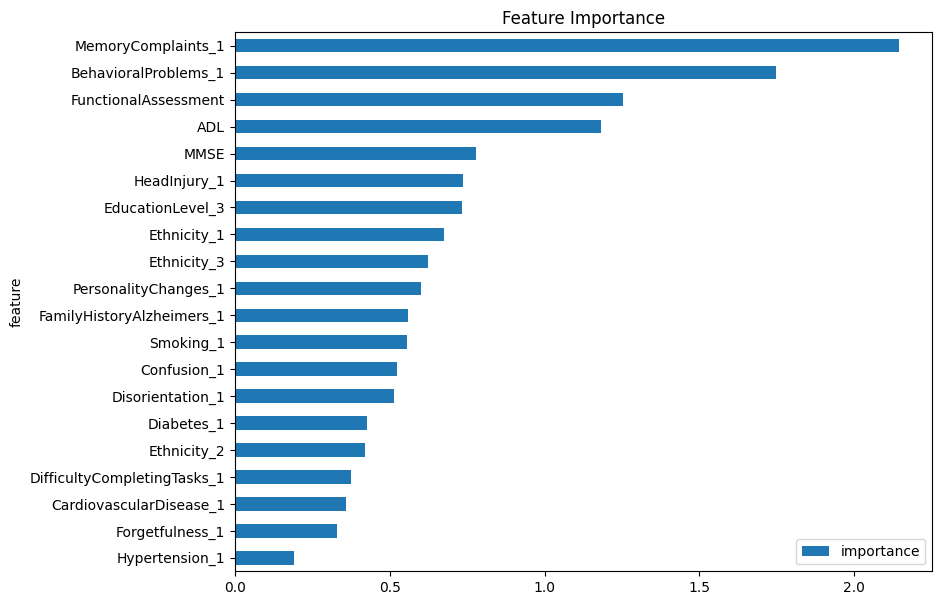

In [473]:
import matplotlib.pyplot as plt

importance_df.head(20).plot.barh(x='feature', y='importance', figsize=(9,7 ))
plt.gca().invert_yaxis()  
plt.title('Feature Importance')
plt.savefig('Feature Importance LR', bbox_inches='tight')
plt.show()

In [310]:
from sklearn.svm import SVC

# 3. Train SVM model
SVM_model = SVC(kernel='linear')  # or 'rbf', 'poly', 'sigmoid', 'linear'
SVM_model.fit(X_train_scaled_res_ohe, y_train_res)

# 4. Predict
y_pred_test = SVM_model.predict(X_test_scaled_ohe)


In [302]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # only for non-linear kernels
}

# Set up grid search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled_res_ohe, y_train_res)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [478]:
from sklearn.metrics import classification_report, confusion_matrix

model=SVM_model

acc(model)

test Accuracy: 0.8116279069767441
[[229  48]
 [ 33 120]]
train
              precision    recall  f1-score   support

           0      0.838     0.831     0.835      1112
           1      0.832     0.840     0.836      1112

    accuracy                          0.835      2224
   macro avg      0.835     0.835     0.835      2224
weighted avg      0.835     0.835     0.835      2224

test
              precision    recall  f1-score   support

           0      0.827     0.874     0.850       262
           1      0.784     0.714     0.748       168

    accuracy                          0.812       430
   macro avg      0.806     0.794     0.799       430
weighted avg      0.810     0.812     0.810       430



In [ ]:
from xgboost import XGBClassifier

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Optional: convert to binary classification
X = X[y != 2]
y = y[y != 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


In [318]:
#XGBoost
from xgboost import XGBClassifier

# Train model
XGBmodel = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBmodel.fit(X_train_scaled_res_ohe, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [382]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50],        # Number of boosting rounds
    'max_depth': [10],                # Tree depth (controls model complexity)
    'learning_rate': [0.01],    # Step size shrinkage
    'subsample': [0.6],          # Row sampling per tree
    'colsample_bytree': [0.6],   # Feature sampling per tree
    'gamma': [1],                    # Minimum loss reduction (regularization)
    'reg_lambda': [5],              # L2 regularization
    'reg_alpha': [0.1],               # L1 regularization
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,            # Try 50 combinations (adjust as needed)
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all cores
)

search.fit(X_train_scaled_res_ohe, y_train_res)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/pasindumadusanka/.pyenv/versions/3.10.13/envs/python_3_10_13-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pasindumadusanka/.pyenv/versions/3.10.13/envs/python_3_10_13-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pasindumadusanka/.pyenv/versions/3.10.13/envs/python_3_10_13-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pasindumadusanka/.pyenv/versions/3.10.13/envs/python_3_10_13-en

Best Params: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}
Best Score: 0.896573539831967


In [479]:
from sklearn.metrics import classification_report, confusion_matrix

model=search.best_estimator_

acc(model)

test Accuracy: 0.9255813953488372
[[269   8]
 [ 24 129]]
train
              precision    recall  f1-score   support

           0      0.894     0.975     0.933      1112
           1      0.972     0.885     0.927      1112

    accuracy                          0.930      2224
   macro avg      0.933     0.930     0.930      2224
weighted avg      0.933     0.930     0.930      2224

test
              precision    recall  f1-score   support

           0      0.971     0.918     0.944       293
           1      0.843     0.942     0.890       137

    accuracy                          0.926       430
   macro avg      0.907     0.930     0.917       430
weighted avg      0.930     0.926     0.927       430



In [384]:
0.930-0.926

0.0040000000000000036

In [375]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [40],
    'max_features': ['sqrt'],
    'bootstrap': [False]
}

rf = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,          # try 50 combinations
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

search.fit(X_train_scaled_res_ohe, y_train_res)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 40, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best Score: 0.8745472777250334


In [480]:
from sklearn.metrics import classification_report, confusion_matrix

model=search.best_estimator_

acc(model)

test Accuracy: 0.9255813953488372
[[269   8]
 [ 24 129]]
train
              precision    recall  f1-score   support

           0      0.894     0.975     0.933      1112
           1      0.972     0.885     0.927      1112

    accuracy                          0.930      2224
   macro avg      0.933     0.930     0.930      2224
weighted avg      0.933     0.930     0.930      2224

test
              precision    recall  f1-score   support

           0      0.971     0.918     0.944       293
           1      0.843     0.942     0.890       137

    accuracy                          0.926       430
   macro avg      0.907     0.930     0.917       430
weighted avg      0.930     0.926     0.927       430



In [475]:
0.913-0.919

-0.006000000000000005

In [377]:
best_rf=search.best_estimator_

In [ ]:
#KNN

In [386]:
from sklearn.neighbors import KNeighborsClassifier

# KNN classifier
KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(X_train_scaled_res_ohe, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [481]:
from sklearn.metrics import classification_report, confusion_matrix

model=KNNmodel

acc(model)

test Accuracy: 0.6348837209302326
[[155 122]
 [ 35 118]]
train
              precision    recall  f1-score   support

           0      0.973     0.781     0.867      1112
           1      0.817     0.978     0.891      1112

    accuracy                          0.880      2224
   macro avg      0.895     0.880     0.879      2224
weighted avg      0.895     0.880     0.879      2224

test
              precision    recall  f1-score   support

           0      0.560     0.816     0.664       190
           1      0.771     0.492     0.601       240

    accuracy                          0.635       430
   macro avg      0.665     0.654     0.632       430
weighted avg      0.678     0.635     0.628       430



In [476]:
0.880-0.635

0.245

In [400]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1,20,5),
    'weights': ['uniform', 'distance'],
    'p': [1],  # Manhattan vs Euclidean
    'algorithm': ['auto']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled_res_ohe, y_train_res)
print(grid.best_params_)


{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [482]:
from sklearn.metrics import classification_report, confusion_matrix

model=grid.best_estimator_

acc(model)

test Accuracy: 0.9465116279069767
[[269   8]
 [ 15 138]]
train
              precision    recall  f1-score   support

           0      0.925     0.972     0.948      1112
           1      0.971     0.921     0.945      1112

    accuracy                          0.946      2224
   macro avg      0.948     0.946     0.946      2224
weighted avg      0.948     0.946     0.946      2224

test
              precision    recall  f1-score   support

           0      0.971     0.947     0.959       284
           1      0.902     0.945     0.923       146

    accuracy                          0.947       430
   macro avg      0.937     0.946     0.941       430
weighted avg      0.948     0.947     0.947       430



In [ ]:
# ada boosting

In [459]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define AdaBoost model with base estimator
base_est = DecisionTreeClassifier()

ada = AdaBoostClassifier(estimator=base_est, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [80],
    'learning_rate': [0.2],
    'estimator__max_depth': [4]
}

# Grid search
grid = GridSearchCV(ada, param_grid, cv=3)
grid.fit(X_train_scaled_res_ohe, y_train_res)


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                          random_state=42),
             param_grid={'estimator__max_depth': [4], 'learning_rate': [0.2],
                         'n_estimators': [80]})

In [484]:
from sklearn.metrics import classification_report, confusion_matrix

model=grid.best_estimator_

acc(model)

test Accuracy: 0.9465116279069767
[[269   8]
 [ 15 138]]
train
              precision    recall  f1-score   support

           0      0.925     0.972     0.948      1112
           1      0.971     0.921     0.945      1112

    accuracy                          0.946      2224
   macro avg      0.948     0.946     0.946      2224
weighted avg      0.948     0.946     0.946      2224

test
              precision    recall  f1-score   support

           0      0.971     0.947     0.959       284
           1      0.902     0.945     0.923       146

    accuracy                          0.947       430
   macro avg      0.937     0.946     0.941       430
weighted avg      0.948     0.947     0.947       430



In [462]:
# best model is adaboosting
Best_model_ada=grid.best_estimator_ 


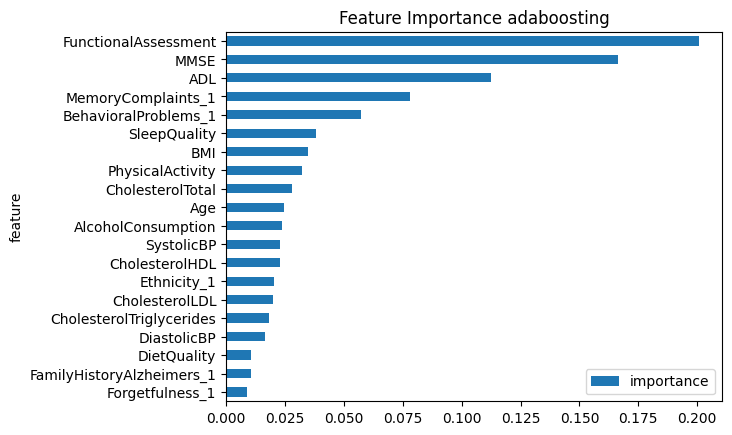

In [470]:
feature_names = X_train_scaled_res_ohe.columns 

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': Best_model_ada.feature_importances_
}).sort_values('importance', ascending=False)

import matplotlib.pyplot as plt

importance_df.head(20).plot.barh(x='feature', y='importance')
plt.gca().invert_yaxis()  
plt.title('Feature Importance adaboosting')
plt.savefig("final feature importance graph", bbox_inches='tight')
plt.show()

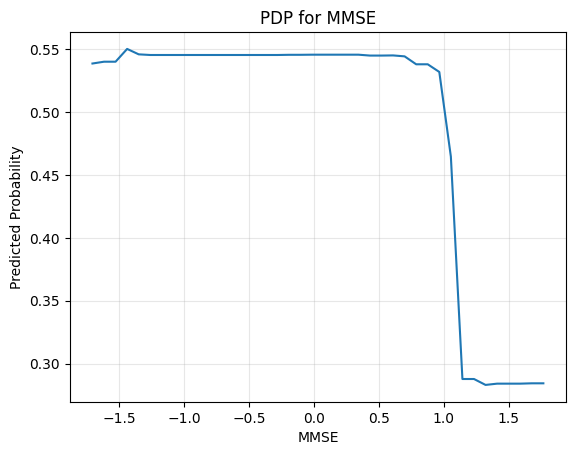

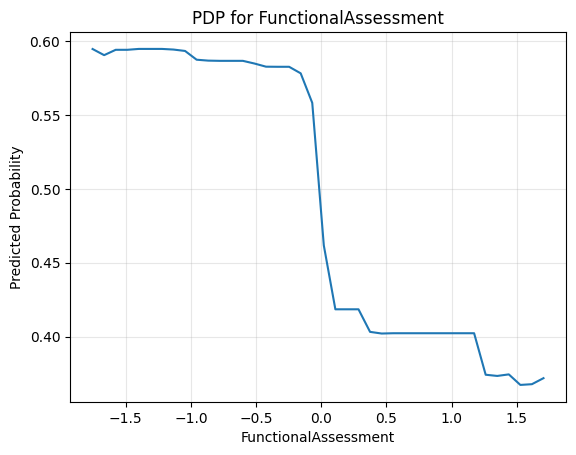

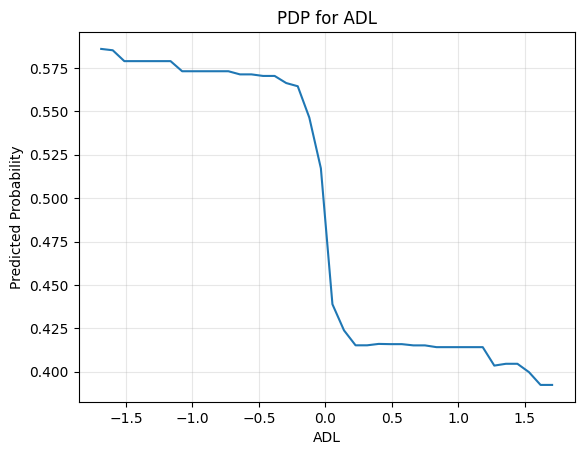

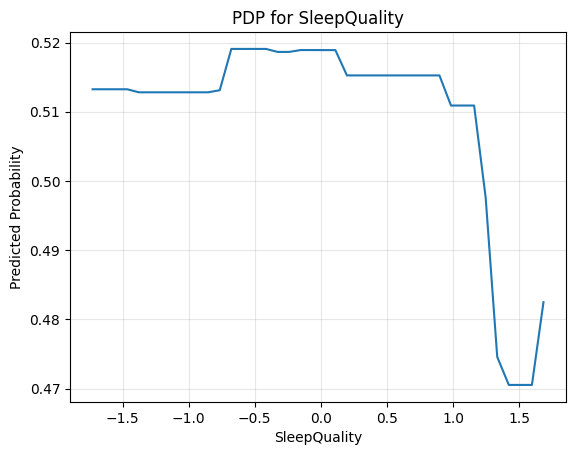

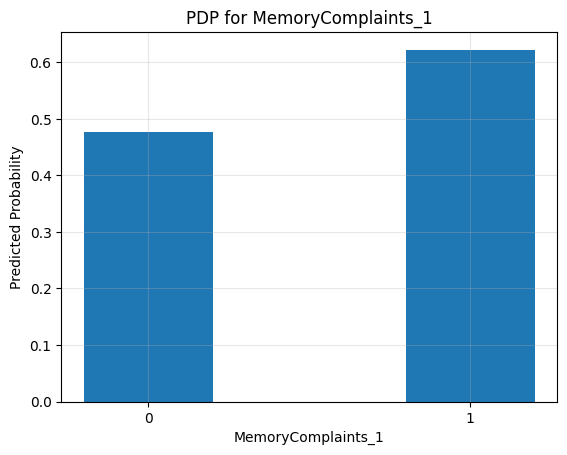

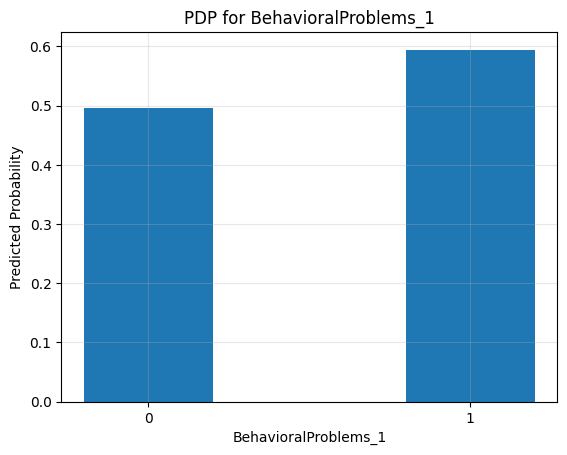

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simple_pdp(model, X, feature_name, is_categorical=False, n_points=40):
    X_df = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
    X_temp = X_df.copy()
    
    if feature_name not in X_df.columns:
        raise ValueError(f"Feature {feature_name} not found")
    
    if is_categorical:
        # For categorical features (0/1 or categories)
        values = sorted(np.unique(X_df[feature_name]))
        probs = []
        for val in values:
            X_temp[feature_name] = val
            probs.append(model.predict_proba(X_temp)[:, 1].mean())
        
        plt.bar(values, probs, width=0.4)
        plt.xticks(values)
    else:
        # For numerical features
        grid = np.linspace(X_df[feature_name].min(), 
                          X_df[feature_name].max(), 
                          n_points)
        probs = []
        for val in grid:
            X_temp[feature_name] = val
            probs.append(model.predict_proba(X_temp)[:, 1].mean())
        
        plt.plot(grid, probs)
    
    plt.xlabel(feature_name)
    plt.ylabel("Predicted Probability")
    plt.title(f"PDP for {feature_name}")
    plt.grid(True, alpha=0.3)
    plt.savefig(f"PDP for {feature_name}")
    plt.show()

# For numerical feature (auto grid)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "MMSE", is_categorical=False)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "FunctionalAssessment", is_categorical=False)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "ADL", is_categorical=False)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "SleepQuality", is_categorical=False)

# For categorical feature (shows all categories)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "MemoryComplaints_1", is_categorical=True)
simple_pdp(Best_model_ada, X_train_scaled_res_ohe, "BehavioralProblems_1", is_categorical=True)